In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel as krnl
from deflected_subgradient import solveDeflected
from SVR import SVR
from svr_grid_search import Gridsearch
import matplotlib.pyplot as plt
import random
import copy
from sklearn.metrics import r2_score

In [2]:
def create_kernel(x, kernel, coef, degree, gamma):
    # interface function to get the desired kernel output
    if kernel == 'linear':
        return krnl.linear(x, x)
    elif kernel == 'rbf':
        return krnl.rbf(x, x, gamma)
    elif kernel == 'poly':
        print('hello')
        return krnl.poly(x, x, gamma, degree, coef)
    elif kernel == 'sigmoid':
        return krnl.sigmoid(x, x, gamma, coef)

# method to get the fstar of a sklearn svr model
def sklearn_fstar(x, y, sklearn_model):
    # create a correct betas array, filling with zeros where needed
    betas = np.zeros(sklearn_model.shape_fit_[0])
    dual_coef_iter = 0
    for i in range(sklearn_model.shape_fit_[0]):
        if i in sklearn_model.support_:
            betas[i] = sklearn_model.dual_coef_[0][dual_coef_iter]
            dual_coef_iter += 1
        else:
            betas[i] = 0.0
    betas = np.vstack(betas)
    
    # create kernel
    K = create_kernel(x, sklearn_model.kernel, sklearn_model.coef0, sklearn_model.degree, sklearn_model.gamma)[0]
    
    # calculate as in below formula
    fstar = (0.5 * np.dot(np.dot(np.transpose(betas), K), betas) 
            + sklearn_model.epsilon * np.sum(np.abs(betas))
            - np.transpose(y).dot(betas))
    return fstar
    

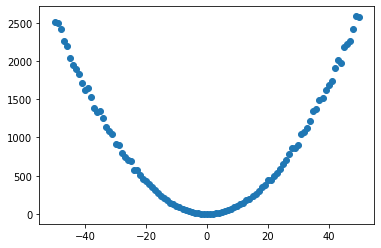

In [3]:
x = np.vstack(np.arange(-50,51,1))
degree = 2
noising_factor = 0.1
y = [xi**degree for xi in x]
y = [ yi + noising_factor * (np.random.rand()*yi) for yi in y]
y=np.array(y, dtype=np.float64)
plt.scatter(x,y)
plt.show()

In [8]:
tr_x, val_x = x[:len(x)-len(x)//5], x[len(x)-len(x)//5:]
tr_y, val_y = y[:len(y)-len(y)//5], y[len(y)-len(y)//5:]
gs = Gridsearch()
gs.set_parameters(
    kernel=["poly", "poly"],
    kparam=[{"degree":2, "gamma":1},{"degree":3, "gamma":1}],
    box=[0.1,1,10],
    eps=[0.05,0.1,0.5],
    optiargs=[{'eps':1e-2, 'maxiter':3e3}, {'eps':1e-2, 'maxiter':5e3}, {'eps':1e-2, 'maxiter':10e3}]
)
best_coarse_model = gs.run(
    tr_x, tr_y, val_x, val_y
)

print("BEST COARSE GRID SEARCH MODEL:",best_coarse_model)

svr = best_coarse_model
kernel, kparam, optiargs, eps, box  = gs.get_model_perturbations(best_coarse_model, 10, 6)
print(kernel, kparam, optiargs)
gs.set_parameters(
    eps=eps,
    box=box,
    kernel=kernel,
    kparam=kparam,
    optiargs=optiargs
)
best_fine_model = gs.run(
    x, y, val_x, val_y
)
print("BEST FINE GRID SEARCH MODEL:", best_fine_model)

svr = best_fine_model
pred = [float(svr.predict(x[i])) for i in range(x.shape[0])]
print("T LOSS:", svr.eps_ins_loss(y, pred))

pred = [float(svr.predict(val_x[i])) for i in range(val_x.shape[0])]
print("V LOSS:", svr.eps_ins_loss(val_y, pred))

(GS - SVR) - Creating models
(GS - SVR) - Fitting 54 models
(GS - SVR) - model 1/54
Fit time: 5.0758020877838135, #SV: 81
	(GS - SVR) - Time taken: 5.0758020877838135 - Remaining: 269.0175106525421
(GS - SVR) - model 2/54
Fit time: 8.656991481781006, #SV: 81
	(GS - SVR) - Time taken: 13.733797788619995 - Remaining: 357.0787425041199
(GS - SVR) - model 3/54
Fit time: 17.147005081176758, #SV: 81
	(GS - SVR) - Time taken: 30.880802869796753 - Remaining: 524.9736487865448
(GS - SVR) - model 4/54
Fit time: 5.361951589584351, #SV: 81
	(GS - SVR) - Time taken: 36.2427544593811 - Remaining: 453.0344307422638
(GS - SVR) - model 5/54
Fit time: 8.460998296737671, #SV: 81
	(GS - SVR) - Time taken: 44.703752756118774 - Remaining: 438.09677700996394
(GS - SVR) - model 6/54
Fit time: 17.242288827896118, #SV: 81
	(GS - SVR) - Time taken: 61.94604158401489 - Remaining: 495.56833267211914
(GS - SVR) - model 7/54
Fit time: 5.312975645065308, #SV: 81
	(GS - SVR) - Time taken: 67.26099348068237 - Remaining

(GS - SVR) - Fitting 60 models
(GS - SVR) - model 1/60
Fit time: 15.46781039237976, #SV: 101
	(GS - SVR) - Time taken: 15.46781039237976 - Remaining: 912.6008131504059
(GS - SVR) - model 2/60
Fit time: 15.199831008911133, #SV: 101
	(GS - SVR) - Time taken: 30.667641401290894 - Remaining: 889.3616006374359
(GS - SVR) - model 3/60
Fit time: 14.948649168014526, #SV: 101
	(GS - SVR) - Time taken: 45.61629056930542 - Remaining: 866.709520816803
(GS - SVR) - model 4/60
Fit time: 14.888418912887573, #SV: 101
	(GS - SVR) - Time taken: 60.505709171295166 - Remaining: 847.0799283981323
(GS - SVR) - model 5/60
Fit time: 15.009875297546387, #SV: 101
	(GS - SVR) - Time taken: 75.51558446884155 - Remaining: 830.6714291572571
(GS - SVR) - model 6/60
Fit time: 15.182247400283813, #SV: 101
	(GS - SVR) - Time taken: 90.69879984855652 - Remaining: 816.2891986370087
(GS - SVR) - model 7/60
Fit time: 14.775610208511353, #SV: 101
	(GS - SVR) - Time taken: 105.47441005706787 - Remaining: 798.5919618606567
(G

Fit time: 20.160715579986572, #SV: 100
	(GS - SVR) - Time taken: 1047.0790901184082 - Remaining: 0.0
(GS - SVR) - Evaluating models
(GS - SVR) - SVR: 0 - TR MEE 547.1485162723822 - VL MEE 707.0656094057231 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [711.93222758]\Optim_args: {'eps': 0.01, 'maxiter': 5000.0, 'vareps': 0.05}
Box: 0.1

(GS - SVR) - SVR: 1 - TR MEE 1750.9333888080978 - VL MEE 2222.5917601769142 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [2276.2275866]\Optim_args: {'eps': 0.0878990599633714, 'maxiter': 5000.0, 'vareps': 0.05}
Box: 0.1

(GS - SVR) - SVR: 2 - TR MEE 752.3846043826562 - VL MEE 965.4623242257607 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [978.64407652]\Optim_args: {'eps': 0.0189546025199434, 'maxiter': 5000.0, 'vareps': 0.05}
Box: 0.1

(GS - SVR) - SVR: 3 - TR MEE 6202.409763323769 - VL MEE 7825.571031299291 - MODEL: 
Kernel: poly
Gamma: 1	Degree: 2	Coef: 0
Intercept: [8059.50916578]\Optim_args: {'eps': 0.05

In [9]:
import time
start = time.time()
svr = SVR("poly", {"degree":degree, "gamma": 1.0638622578446995, 'coef': 0.3834567868153642}, box=0.1)
svr.fit(x, y, {'eps': 0.01, 'maxiter': 5000.0, 'vareps': 0.05}, optim_verbose=False)
print(f"elapsed time {time.time() - start}")

Fit time: 15.249953508377075, #SV: 101
elapsed time 15.249953508377075


b: [-10.24299101]
Gamma: 1.0638622578446995 - Box: 0.1
PREDICTION (INPUT = 12) [[146.1826161]]
LOSS: [102853.6570213]


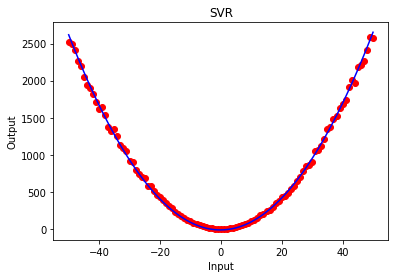

0.9983660050375135

In [10]:
to_predict = 12
pred = svr.predict(to_predict)
print(f"b: {svr.intercept}")
print(f"Gamma: {svr.gamma_value} - Box: {svr.box}")
print(f'PREDICTION (INPUT = {to_predict})', pred)
pred = [float(svr.predict(np.array([x[i]]))) for i in range(x.size)]
print("LOSS:", svr.eps_ins_loss(y, pred))
plt.scatter(x, y , color="red")
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()
r2_score(y, pred)

elapsed time 0.00599980354309082
 b: [34.70135136]
Gamma: 1.0638622578446995 - Box: 0.1
PREDICTION (INPUT = 12) [179.38482852]


c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


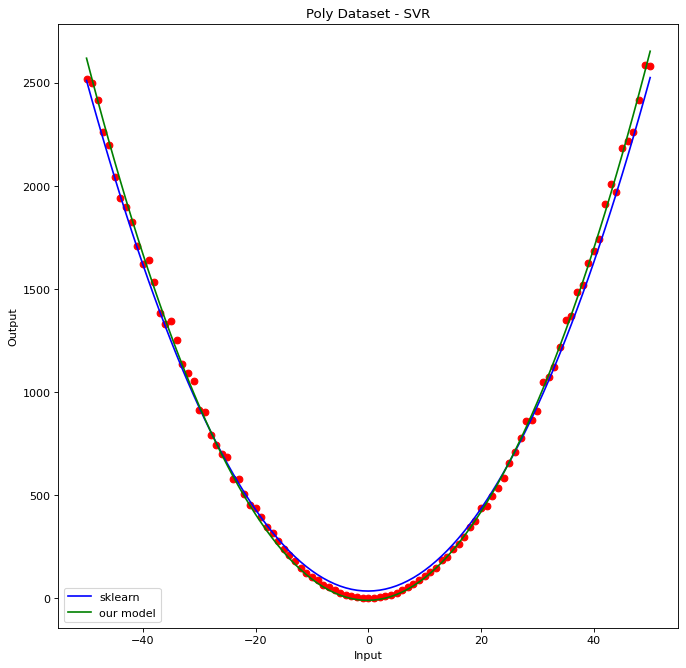

0.9963680055619923

In [15]:
import sklearn.svm as ss
import time
start = time.time()
regressor = ss.SVR(kernel = 'poly', C=0.1, epsilon=0.05, degree=degree, gamma=1.0638622578446995, max_iter=5e3, coef0=0.3834567868153642)

xs = x
ys = y
regressor.fit(xs, ys.ravel())
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(np.array([[to_predict]]))
print(f" b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

sklearn_predict = regressor.predict(x)
from matplotlib.pyplot import figure
figure(figsize=(10,10), dpi=80)
plt.scatter(x, y, color = 'red')
plt.plot(x, sklearn_predict, color = 'blue', label='sklearn')
plt.plot(x, pred, color = 'green', label='our model')
plt.title('Poly Dataset - SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()
r2_score(y, sklearn_predict)

In [16]:
print("eps:",regressor.epsilon)
print("b:",regressor.intercept_)
params = regressor.get_params()
print("gamma:",params['gamma'])
print("C:",params['C'])
print("sv:",regressor.support_vectors_)
print("supp index:",regressor.support_)

eps: 0.05
b: [34.70135136]
gamma: 1.0638622578446995
C: 0.1
sv: [[-50.]
 [-49.]
 [-48.]
 [-47.]
 [-46.]
 [-45.]
 [-44.]
 [-43.]
 [-42.]
 [-41.]
 [-40.]
 [-39.]
 [-38.]
 [-37.]
 [-36.]
 [-35.]
 [-34.]
 [-33.]
 [-32.]
 [-31.]
 [-30.]
 [-29.]
 [-28.]
 [-27.]
 [-25.]
 [-24.]
 [-23.]
 [-22.]
 [-21.]
 [-20.]
 [-19.]
 [-18.]
 [-17.]
 [-16.]
 [-15.]
 [-14.]
 [-13.]
 [-12.]
 [-11.]
 [ -9.]
 [ -8.]
 [ -7.]
 [ -6.]
 [ -5.]
 [ -4.]
 [ -3.]
 [ -2.]
 [ -1.]
 [  0.]
 [  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [ 46.]
 [ 47.]
 [ 48.]
 [ 49.]
 [ 50.]]
supp index: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36
  37  38 

In [17]:
regressor.n_support_

array([96])

In [22]:
regressor.get_params()

{'C': 10,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 2,
 'epsilon': 0.05,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': 1000.0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
regressor.dual_coef_

array([[ 1.00000000e+01,  1.00000000e+01, -1.69247565e-01,
        -1.00000000e+01,  7.34295825e-01, -4.31274708e-01,
        -1.00000000e+01, -2.94029132e+00, -1.32766103e-03,
        -5.11755893e-01, -2.82888651e+00, -1.32104706e+00,
         9.15097412e-01,  3.74791971e+00,  2.94029132e+00,
         1.00000000e+01, -3.03021117e-01,  1.00000000e+01,
        -1.00000000e+01, -9.83075243e+00]])

In [12]:
sklearn_fstar(x, y, regressor), svr.history['fstar']

hello


(array([[-187.81958048]]), -36.68929794685755)